# Exploratory Data Analysis

File Name: exploratory_data_analysis.ipynb
Purpose: Data visualization
Outline:
1. Location Map: Fig1
2. Geolocation of spills: Fig2
3. Draw Tradeoff plot (Fig3a)
4. Draw cluster (Fig3b)

Developer: Tanmoy Das
Date: March 2023

In [1]:
# Import Python libraries
import pandas as pd
import folium

import geopandas as gpd
import shapely
import custom_func, eda

import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\eda.py:61: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  linestring = geom.explode()
C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\multiobjective_location_allocation_env\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [2]:
#
# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]

current_st = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current')
acp = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations')

In [3]:
coordinates_current_st = custom_func.extract_station_coordinate(current_st)
coordinate_current_st_df = pd.DataFrame(coordinates_current_st[0])
coordinate_current_st_df.columns = ['Latitude','Longitude']
coordinate_current_st_df['Capacity'] = current_st['Capacity'].copy()
coordinate_current_st_df['FacilityLocation'] = current_st['FacilityLocation'].copy()

coordinates_acp = custom_func.extract_station_coordinate(acp)
coordinate_df_acp = pd.DataFrame(coordinates_acp[0])
coordinate_df_acp.columns = ['Latitude','Longitude']
coordinate_df_acp['Capacity'] = acp['Capacity'].copy()

# Fig4
## (a) Current response stations and cache

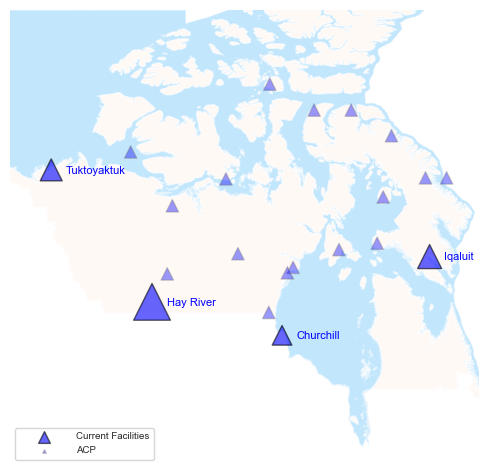

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='blue', edgecolors='black')

for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
# Facility location

acp = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)

ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig4a current facilities & cache.png', transparent=True)

## (b) Sensitive areas

In [5]:
# Load geometric file for map
gerome_ = gpd.read_file("Inputs/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp")
marine_protective_area = gpd.read_file("Inputs/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/prot_areas_p.shp")
indigenous_population = gpd.read_file("Inputs/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/popplace_pt.shp")
gerome_shp = gerome_.to_crs(epsg=4326)
marine_protective_area = marine_protective_area.to_crs(epsg=4326)
indigenous_population_area = indigenous_population.to_crs(epsg=4326)

In [6]:
gerome_shp['Sensitivity_n'] = (gerome_shp['Sensitivit']-min(gerome_shp['Sensitivit']))/(max(gerome_shp['Sensitivit'])-min(gerome_shp['Sensitivit']))

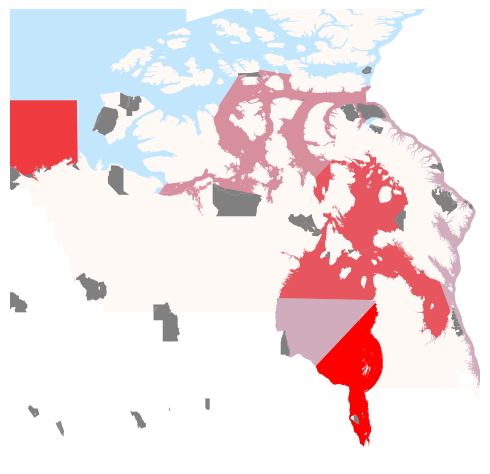

In [43]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'Outputs/Sensitivity.png', transparent=True)

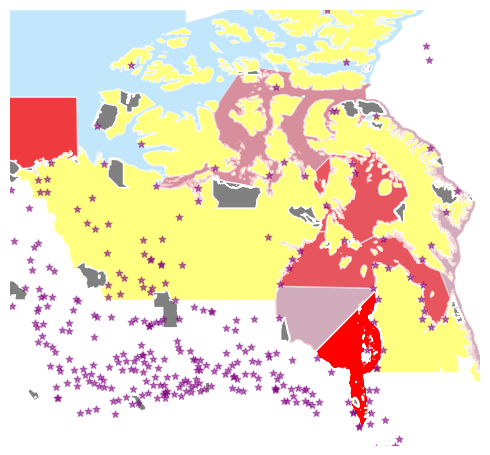

In [14]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="yellow", alpha=0.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=0.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)

mpa_plot = indigenous_population_area.plot(ax=ax, marker='*',markersize=25, color='purple', zorder=3, alpha=.5)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'Outputs/Fig3b Sensitivity2.png', transparent=True)

# Transparent Figures for presentation

## Current facilities

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))


st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='blue', edgecolors='black')

for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
# Facility location

acp = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)

ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig4a current facilities & cache.png', transparent=True)

## Proposed station coordinates

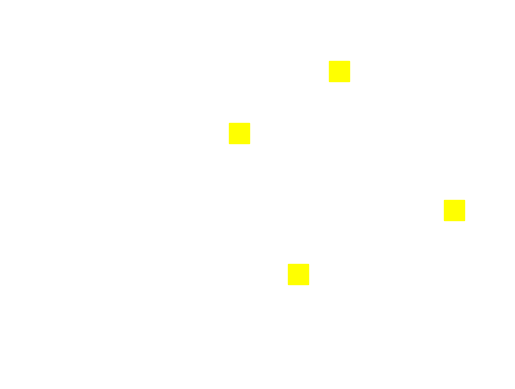

In [9]:
#
dataframe = pd.read_excel('Outputs/current vs proposed.xlsx', sheet_name='proposed coordinates')


fig, ax = plt.subplots() #figsize=(8,3)
coordinates_spill = custom_func.extract_station_coordinate(dataframe)
coordinate_df = pd.DataFrame(coordinates_spill[0])
coordinate_df.columns = ['Latitude','Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)
st = plt.scatter(data=coordinate_df,
                 x='Longitude', y='Latitude', marker='s', alpha=1, s=200,
                 c='yellow')
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/proposed_stations.png', transparent=True)

## Shapefile to transparent fig

## Shipping Route

In [20]:
import eda
import geopandas as gpd
file_url = "Inputs/ArcGIS_data/Shipping_and_Hydrography/Canadian_Shipping_Routes.shp"
name = 'shipping_route'
#Map_Plot = eda.plot_shp_to_transparent_fig(file_url, name)

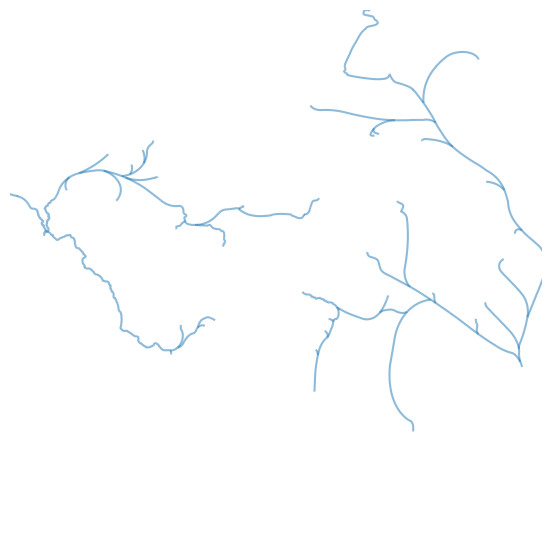

In [21]:
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_Plot = Map_shp.plot(ax=ax,  alpha=.5) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

## Sensitivity


C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\eda.py:59: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  linestring = geom.explode()
C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\multiobjective_location_allocation_env\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


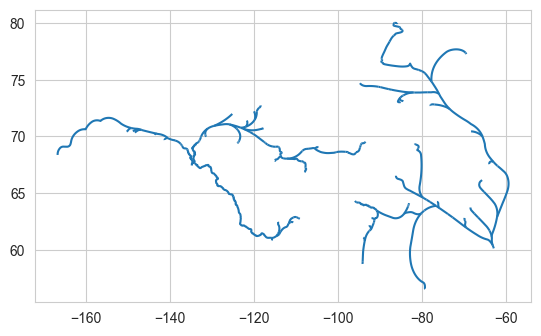

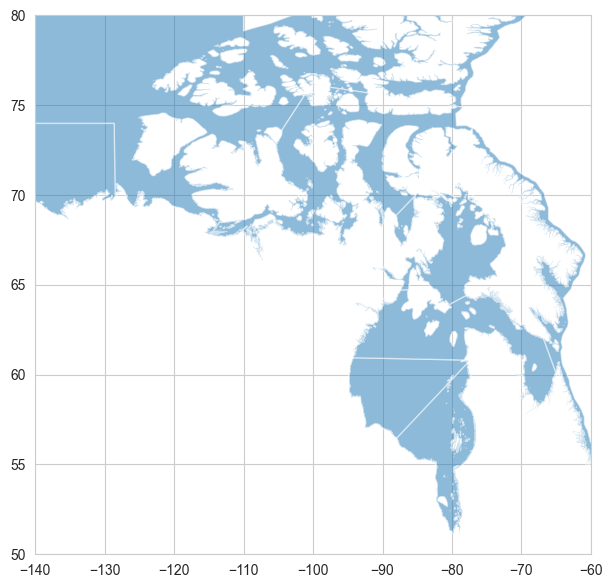

In [10]:
import eda
file_url = "Inputs/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp"
name = 'Sensitivity'
eda.plot_shp_to_transparent_fig(file_url, name)

In [11]:
import geopandas as gpd
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_shp

,OBJECTID,Name,Nom,Inuktitut,Sensitivit,Shape_Leng,Shape_Area,geometry
0,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,2.0,1147.511909,328.048958,"POLYGON ((-78.55335 74.89394, -79.48762 74.947..."
1,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,59.881779,46.438061,"POLYGON ((-77.81897 60.61790, -77.82349 60.616..."
2,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,10.0,182.652950,44.649343,"POLYGON ((-77.62620 59.70276, -77.62997 59.702..."
3,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,334.995051,71.712847,"POLYGON ((-74.05052 64.69202, -74.06466 64.694..."
4,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,552.022943,31.118305,"POLYGON ((-57.38534 54.14958, -57.37456 54.147..."
5,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,8.0,77.723227,55.606925,"POLYGON ((-128.48285 69.90550, -128.49867 69.9..."
6,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,253.592294,48.824293,"POLYGON ((-73.80861 68.56542, -73.82976 68.566..."
7,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,5.0,592.115718,92.393179,"POLYGON ((-94.79544 75.83231, -94.79201 75.811..."


In [12]:
Map_shp['Sensitivity_n'] = (Map_shp['Sensitivit']-min(Map_shp['Sensitivit']))/(max(Map_shp['Sensitivit'])-min(Map_shp['Sensitivit']))


In [22]:
display(Map_shp)

,OBJECTID,Name,Nom,Inuktitut,Sensitivit,Shape_Leng,Shape_Area,geometry,Sensitivity_n
0,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,2.0,1147.511909,328.048958,"POLYGON ((-78.55335 74.89394, -79.48762 74.947...",0.000
1,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,59.881779,46.438061,"POLYGON ((-77.81897 60.61790, -77.82349 60.616...",0.250
2,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,10.0,182.652950,44.649343,"POLYGON ((-77.62620 59.70276, -77.62997 59.702...",1.000
3,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,334.995051,71.712847,"POLYGON ((-74.05052 64.69202, -74.06466 64.694...",0.625
4,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,552.022943,31.118305,"POLYGON ((-57.38534 54.14958, -57.37456 54.147...",0.250
5,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,8.0,77.723227,55.606925,"POLYGON ((-128.48285 69.90550, -128.49867 69.9...",0.750
6,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,253.592294,48.824293,"POLYGON ((-73.80861 68.56542, -73.82976 68.566...",0.625
7,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,5.0,592.115718,92.393179,"POLYGON ((-94.79544 75.83231, -94.79201 75.811...",0.375


[0    0.000
 1    0.250
 2    1.000
 3    0.625
 4    0.250
 5    0.750
 6    0.625
 7    0.375
 Name: Sensitivit, dtype: float64]

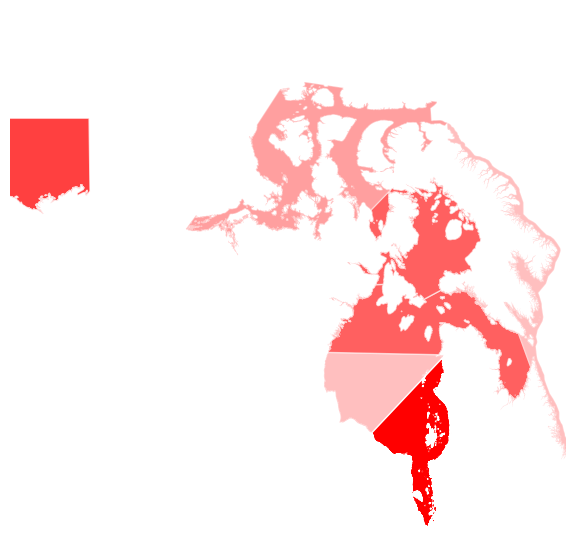

In [13]:
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
Map_Plot = Map_shp.plot(ax=ax, color='red', alpha=Map_shp['Sensitivity_n']) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

In [16]:
max(Map_shp['Sensitivit'])

10.0

## Spill coordinates as transparent fig

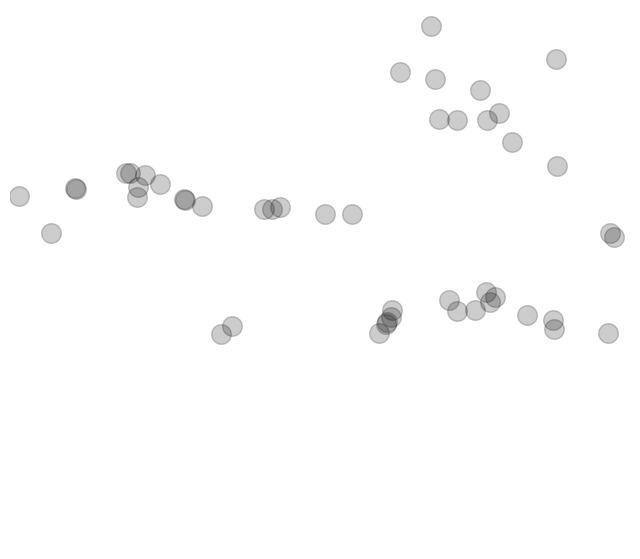

In [15]:
import eda
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import custom_func

spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
spill_data = spill_data.sample(n=50)
name = 'spill points'

fig, ax = plt.subplots(figsize=(8,7))
coordinates = custom_func.extract_coordinate(spill_data)
coordinate_df = pd.DataFrame(coordinates[0])
coordinate_df.columns = ['Latitude', 'Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)

plt.scatter(data=coordinate_gdf,
                 x='Longitude', y='Latitude', marker='o', alpha=.2, s=200,
                 # s=amountSt_groupby['amountSt_display'],
                 c='black')
ax.set_xlim([-140, -60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

In [ ]:
import geopandas as gpd
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
fig.savefig(f'Outputs/Arctic_transparent.png', transparent=True)
# plt.show()

# Figure 3: Facilities and potential oil spills in Hudson Strait

In [ ]:
# Spill data
spill_Hudson = pd.read_csv('Outputs/Hudson_df_oilspill.csv', header=None)
spill_Hudson.head()

In [ ]:
# 10 random spills
spill_Hudson_1 = spill_Hudson[spill_Hudson[0]<-80].sample(n=1, replace=False)
spill_Hudson_3 = spill_Hudson[spill_Hudson[1]<60].sample(n=2, replace=False)
spill_Hudson_4 = spill_Hudson[spill_Hudson[1]<70].sample(n=2, replace=False)
spill_Hudson_Strait = spill_Hudson[(spill_Hudson[0] > -82) & (spill_Hudson[0]<-65) 
                               & (spill_Hudson[1]>60) & (spill_Hudson[1]<65)].sample(n=5, replace=False)

spill_Hudson_10 = pd.concat([spill_Hudson_Strait,spill_Hudson_1,spill_Hudson_3,spill_Hudson_4])
# Produce map
map_hudson = folium.Map(location=[60, -80], width='45%', height='60%', zoom_start=3.5, min_zoom=2.5, max_zoom=7)
# map_hudson
# Draw the oil spills
for point_spill in range(len(spill_Hudson_10)):
    folium.CircleMarker(location=[spill_Hudson_10.iloc[point_spill][1], spill_Hudson_10.iloc[point_spill][0]],
                        radius=10,
                        color='black', fill=True,
                        opacity=0.5,
                        fill_opacity=.5).add_to(map_hudson)
map_hudson

In [ ]:
spill_Hudson_10.to_csv('Outputs/spill_Hudson_10.csv',header=False, index=False)

In [ ]:
map_hudson.save('Outputs/Fig3_Hudsonspill.html')

In [ ]:
spill_Hudson

In [ ]:
# Produce map
map_hudson = folium.Map(location=[60, -80], width='45%', height='60%', zoom_start=3.5, min_zoom=2.5, max_zoom=7)
# map_hudson
# Draw the oil spills
for point_spill in range(len(spill_Hudson_10)):
    folium.CircleMarker(location=[spill_Hudson_10.iloc[point_spill][1], spill_Hudson_10.iloc[point_spill][0]],
                        radius=10,
                        color='black', fill=True,
                        opacity=0.5,
                        fill_opacity=.5).add_to(map_hudson)
map_hudson

In [ ]:
# Draw Stations
coordinates_st = [(60.53, -95.38),(64.202, -83.91), (60.62, -75.41)]
folium.TileLayer(opacity=1).add_to(map_hudson)
for point in range(0, len(coordinates_st)):
    iconStation = folium.features.CustomIcon('Outputs/station_icon.png', icon_size=30)
    folium.Marker(coordinates_st[point], icon=iconStation).add_to(map_hudson)
map_hudson
#map_st.save('Outputs/response_stations.html')

In [ ]:
map_hudson.save('Outputs/Fig3_Hudson_spill.html')

In [ ]:
spill_Hudson_10.iloc[point_spill][0]

In [ ]:
shipping_route = map_st.choropleth(geo_data="Inputs/ArcGIS_data/Shipping_and_Hydrography.geojson")
map_st.save('Outputs/map_st_SN_route.html')

In [ ]:
# reading geojson file
shipping_route_df = gpd.read_file('Inputs/ArcGIS_data/Shipping_and_Hydrography.geojson')
shipping_route_df.plot()

In [ ]:
geom = shipping_route_df.geometry
linestring2 = geom.explode()
linestring11 = linestring2[11]
# write a for loop for go all LineString
list1 = list(linestring2.geometry.iloc[0].coords)
Hudson = [list1 for item in list1 if item[0]>-90]

In [ ]:
Hudson_df_oilspill = pd.read_csv('Outputs/Hudson_df_oilspill.csv')

In [ ]:
geo_data="Inputs/ArcGIS_data/Shipping_and_Hydrography.geojson"

In [ ]:
geo_data

In [ ]:
# %% Fig 0: Oil Spills in Canada
data_historical_indidents = pd.read_excel('Inputs/data_location_allocation_Canadian_Arctic_Hypothetical.xlsx',
                                          sheet_name='historical spill in Canada').copy()
data_historical_indidents.columns
data_bubbleplot = data_historical_indidents[['Type', 'Year', 'Incident Reason', 'Spill Size (Tonnes)']]
data_bubbleplot.head()

# %%
# processing data
# replace some values with Misc in Type
data_bubbleplot['Type'].unique()
data_bubbleplot2 = data_bubbleplot.replace(' Fuel Barge', ' Miscellaneous', regex=True)
data_bubbleplot2 = data_bubbleplot2.replace(' Floating Production Storage and Offloading', ' Miscellaneous', regex=True)
data_bubbleplot2 = data_bubbleplot2.replace(' Tug Boat', ' Miscellaneous', regex=True)
data_bubbleplot2 = data_bubbleplot2.replace(' RORO Ferry', ' Miscellaneous', regex=True)
data_bubbleplot2 = data_bubbleplot2.replace(' Bulk Carrier', ' Miscellaneous', regex=True)

# reason cleaned
data_bubbleplot['Incident Reason'].unique()
data_bubbleplot2 = data_bubbleplot2.replace(' Leaking a ball valve', ' Leakage')
data_bubbleplot2 = data_bubbleplot2.replace(' Leaking spool piece', ' Leakage')
data_bubbleplot2 = data_bubbleplot2.replace(' Leak in a flowline', ' Leakage')
data_bubbleplot2 = data_bubbleplot2.replace(' Leakage', ' Leak')
# %%
size = data_bubbleplot2['Spill Size (Tonnes)']
arr2 = 10000*abs(np.log(size))
data_bubbleplot2['Size_log'] = arr2



# %%

fig1 = plt.figure(figsize=(14, 6), dpi=600)
fig = px.scatter(data_bubbleplot2, x="Year", y="Type",
                 # animation_frame="Month",  # animation_group="LocationIn",hover_name="LocationIn" ,
                 color="Incident Reason", size="Size_log", size_max=50)  # , range_x=[     100,100000], range_y=[25,90],

fig1.patch.set_facecolor('blue')
# fig["layout"].pop("updatemenus") # optional, drop animation buttons

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.update_layout(font = dict(family="Courier New",size=25, color="Black"))
fig.update_xaxes(linecolor ='black')
fig.update_yaxes(linecolor ='black')

fig.write_image("Outputs/incidents.png")  # install kaleido package before write_image
fig.show()

# %% Fig 1
# collect data
station_data = pd.read_excel('Inputs/data_PAMIP.xlsx', sheet_name='stations', header=0).copy()
sensivity_data5 = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data5.shp').copy().reset_index()

# process data
coordinates_ = station_data[['Coordinates']]  # .values.tolist()
resource_amount = station_data[['Resources total']]
max_resource = station_data[['Resources total']].max()

coordinates_st = custom_functions.extract_coordinate(station_data)

# Produce map
map_st = folium.Map(location=[67, -98], zoom_start=4, min_zoom=2.5, max_zoom=7)
# min_zoom and max_zoom to control quantity of zoom

# Draw Stations
for point in range(0, len(coordinates_st)):
    # showing stations
    # Custom icon
    # icon_size = int(resource_amount.loc[point].values / 2)
    icon_size = int((resource_amount.loc[point].values / max_resource) * 100)

    if icon_size > 100:
        icon_size = 100  # just to make sure homes are NOT too big
    iconStation = folium.features.CustomIcon('Outputs/station_icon.png',
                                             icon_size=(icon_size, icon_size))
    folium.Marker(coordinates_st[point], icon=iconStation).add_to(map_st)

    # showing number
    folium.Marker(location=[coordinates_st[point][0] - .9, coordinates_st[point][1]],
                  icon=folium.DivIcon(
                      icon_size=(150, 36),
                      icon_anchor=(7, 20),
                      html=f'<div style="font-size: 12pt;">{point + 1}</div>',
                  )).add_to(map_st)
    # circle for the number
    # map_st.add_child(folium.CircleMarker([72.89, -124.59+2], radius=15))
map_st
map_st.save('Outputs/response_stations.html')

# Draw sensitive area
# Set up Choropleth map
map_st_SN = map_st
map_st_SN.choropleth(
    geo_data=sensivity_data5,
    name='Choropleth',
    data=sensivity_data5,
    columns=['index', 'Sensitivit'],
    key_on="feature.properties.index",
    # range_color=(0, 14),
    fill_color='PuRd',
    #   'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu',
    #   'YlGn', 'YlGnBu', 'YlOrBr', and 'YlOrRd'.
    # threshold_scale=myscale,
    fill_opacity=.7,
    line_opacity=.2,
    legend_name='Sensitivity',
    smooth_factor=0
)
map_st_SN.save('Outputs/map_st_SN.html')

# Draw shipping route
# map_shipping_spill = folium.Map(location=spill_coordinates.iloc[0], zoom_start=4, min_zoom=2.5, max_zoom=7)
map_st_SN_route = map_st_SN
map_st_SN_route.choropleth(geo_data="Inputs/ArcGIS_data/Shipping_and_Hydrography.geojson")
map_st_SN_route.save('Outputs/map_st_SN_route.html')

# %% Geolocation of spills: Fig2
# import data
gdf_route = gpd.read_file('Inputs/ArcGIS_data/Shipping_and_Hydrography.geojson')
spill_data = pd.read_excel('Inputs/data_PAMIP.xlsx', sheet_name='spills', header=0).copy()
# process data
spill_size = spill_data[['Spill size']]
max_spill = spill_data[['Spill size']].max()
gdf3 = gdf_route.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))
# x & y coordinated were interchanged when loading geojson file
exploded3 = gdf3.explode()  # why
point5 = exploded3.geometry  # why
centroids223 = point5.centroid


# Geoseries point to Python List
def coord_lister(geom):
    coords = list(geom.coords)
    return coords[0]


spill_coordinates = centroids223.geometry.apply(coord_lister)

# Draw empty map
map_shipping_spill = folium.Map(location=spill_coordinates.iloc[0], zoom_start=4, min_zoom=2.5, max_zoom=7)

# Draw the Shipping route
map_shipping_spill.choropleth(geo_data="Inputs/ArcGIS_data/Shipping_and_Hydrography.geojson")
# Draw the oil spills
for point_spill in range(0, len(spill_coordinates)):
    icon_size = int((spill_size.loc[point_spill].values / max_spill) * 30)
    folium.CircleMarker(location=[spill_coordinates.iloc[point_spill][0], spill_coordinates.iloc[point_spill][1]],
                        radius=icon_size,
                        color='black', fill=True,
                        opacity=0.1,
                        fill_opacity=.5).add_to(map_shipping_spill)
map_shipping_spill.save('Outputs/oil_spills_Fig2.html')


# %%
# Tradeoff plot
def draw_tradeoff_plot(NumberStMax_data, selected):
    x = NumberStMax_data['NumberStMax']  # np.arange(0, 50, 2)
    # ['NumberStMax', 'Coverage %', 'Response time (in hours)']
    # y-axis values
    y1 = NumberStMax_data['Coverage %']
    y2 = NumberStMax_data['Response time (in hours)']

    # plotting figures by creating axes object
    # using subplots() function
    fig, ax = plt.subplots(figsize=(5, 3))
    # plt.title('Example of Two Y labels')

    # using the twinx() for creating another
    # axes object for secondary y-Axis
    ax2 = ax.twinx()
    ax.plot(x, y1, 'o--', color='g', lw=1)
    ax.scatter(x[selected - 1], y1[selected - 1], facecolors='none', edgecolors='r', lw=4)
    # ax.plot(x[3], y1[3], 'o', color='red', lw=1, facecolors='none')
    ax2.plot(x, y2, '*-', color='b', lw=0.5)

    # giving labels to the axises
    ax.set_xlabel('Number of stations', color='black')
    ax.set_ylabel('Maximal Coverage', color='g')

    ax.yaxis.label.set_color('green')
    ax.tick_params(axis='y', colors='green')
    ax2.yaxis.label.set_color('blue')
    ax2.tick_params(axis='y', colors='blue')
    # plt.annotate('local max', xy=(4, 90), xytext=(3, 1.5))
    ax.text(selected - 1, 92, f'{y1[selected - 1]}%', color='g', fontsize=8)

    # secondary y-axis label
    ax2.set_ylabel('Total distance travelled', color='b')

    # defining display layout
    plt.tight_layout()

    # show plot
    plt.show()
    plt.savefig('Outputs/Tradeoff.png')


# %% Clustering
# Draw cluster and centroids
#
def draw_cluster(icon_size_list, coordinates_spill, memberships, centroids):
    size_10times = [item * 10 for item in icon_size_list]
    fig_c = plt.figure(figsize=(8, 5), dpi=350)
    plt.scatter(*zip(*coordinates_spill), c=memberships, s=size_10times, alpha=0.5)

    plt.scatter(*zip(*centroids), c='red', marker='o', s=50, alpha=0.5)
    plt.scatter(*zip(*centroids), c=range(len(centroids)), marker='*', s=20)
    plt.show()
    fig_c.savefig('Outputs/spill_cluster_centroid2.png')
